# Python Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import warnings
warnings.simplefilter(action="ignore")
import sklearn.metrics as metrics
from sklearn.metrics import auc, f1_score,confusion_matrix,accuracy_score ,classification_report, accuracy_score, classification_report, roc_auc_score,roc_curve
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score, StratifiedKFold,cross_val_score

#Models
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
import lightgbm as lgb
from sklearn.svm import SVC

#Installation
pip install scikeras
import scikeras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization
from scikeras.wrappers import KerasClassifier
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
import torch
from torch import nn, optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset, Subset


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Data Import

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/heart_disease.csv")
data

,Age,Gender,Blood Pressure,Cholesterol Level,Exercise Habits,Smoking,Family Heart Disease,Diabetes,BMI,High Blood Pressure,...,High LDL Cholesterol,Alcohol Consumption,Stress Level,Sleep Hours,Sugar Consumption,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level,Heart Disease Status
0,56.0,Male,153.0,155.0,High,Yes,Yes,No,24.991591,Yes,...,No,High,Medium,7.633228,Medium,342.0,NaN,12.969246,12.387250,No
1,69.0,Female,146.0,286.0,High,No,Yes,Yes,25.221799,No,...,No,Medium,High,8.744034,Medium,133.0,157.0,9.355389,19.298875,No
2,46.0,Male,126.0,216.0,Low,No,No,No,29.855447,No,...,Yes,Low,Low,4.440440,Low,393.0,92.0,12.709873,11.230926,No
3,32.0,Female,122.0,293.0,High,Yes,Yes,No,24.130477,Yes,...,Yes,Low,High,5.249405,High,293.0,94.0,12.509046,5.961958,No
4,60.0,Male,166.0,242.0,Low,Yes,Yes,Yes,20.486289,Yes,...,No,Low,High,7.030971,High,263.0,154.0,10.381259,8.153887,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,25.0,Female,136.0,243.0,Medium,Yes,No,No,18.788791,Yes,...,Yes,Medium,High,6.834954,Medium,343.0,133.0,3.588814,19.132004,Yes
9996,38.0,Male,172.0,154.0,Medium,No,No,No,31.856801,Yes,...,Yes,NaN,High,8.247784,Low,377.0,83.0,2.658267,9.715709,Yes
9997,73.0,Male,152.0,201.0,High,Yes,No,Yes,26.899911,No,...,Yes,NaN,Low,4.436762,Low,248.0,88.0,4.408867,9.492429,Yes
9998,23.0,Male,142.0,299.0,Low,Yes,No,Yes,34.964026,Yes,...,Yes,Medium,High,8.526329,Medium,113.0,153.0,7.215634,11.873486,Yes


In [ ]:
df = pd.DataFrame(data)
df

,Age,Gender,Blood Pressure,Cholesterol Level,Exercise Habits,Smoking,Family Heart Disease,Diabetes,BMI,High Blood Pressure,...,High LDL Cholesterol,Alcohol Consumption,Stress Level,Sleep Hours,Sugar Consumption,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level,Heart Disease Status
0,56.0,Male,153.0,155.0,High,Yes,Yes,No,24.991591,Yes,...,No,High,Medium,7.633228,Medium,342.0,NaN,12.969246,12.387250,No
1,69.0,Female,146.0,286.0,High,No,Yes,Yes,25.221799,No,...,No,Medium,High,8.744034,Medium,133.0,157.0,9.355389,19.298875,No
2,46.0,Male,126.0,216.0,Low,No,No,No,29.855447,No,...,Yes,Low,Low,4.440440,Low,393.0,92.0,12.709873,11.230926,No
3,32.0,Female,122.0,293.0,High,Yes,Yes,No,24.130477,Yes,...,Yes,Low,High,5.249405,High,293.0,94.0,12.509046,5.961958,No
4,60.0,Male,166.0,242.0,Low,Yes,Yes,Yes,20.486289,Yes,...,No,Low,High,7.030971,High,263.0,154.0,10.381259,8.153887,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,25.0,Female,136.0,243.0,Medium,Yes,No,No,18.788791,Yes,...,Yes,Medium,High,6.834954,Medium,343.0,133.0,3.588814,19.132004,Yes
9996,38.0,Male,172.0,154.0,Medium,No,No,No,31.856801,Yes,...,Yes,NaN,High,8.247784,Low,377.0,83.0,2.658267,9.715709,Yes
9997,73.0,Male,152.0,201.0,High,Yes,No,Yes,26.899911,No,...,Yes,NaN,Low,4.436762,Low,248.0,88.0,4.408867,9.492429,Yes
9998,23.0,Male,142.0,299.0,Low,Yes,No,Yes,34.964026,Yes,...,Yes,Medium,High,8.526329,Medium,113.0,153.0,7.215634,11.873486,Yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   9971 non-null   float64
 1   Gender                9981 non-null   object 
 2   Blood Pressure        9981 non-null   float64
 3   Cholesterol Level     9970 non-null   float64
 4   Exercise Habits       9975 non-null   object 
 5   Smoking               9975 non-null   object 
 6   Family Heart Disease  9979 non-null   object 
 7   Diabetes              9970 non-null   object 
 8   BMI                   9978 non-null   float64
 9   High Blood Pressure   9974 non-null   object 
 10  Low HDL Cholesterol   9975 non-null   object 
 11  High LDL Cholesterol  9974 non-null   object 
 12  Alcohol Consumption   7414 non-null   object 
 13  Stress Level          9978 non-null   object 
 14  Sleep Hours           9975 non-null   float64
 15  Sugar Consumption   

# Data Pre-Processing

## Check Duplicates

In [ ]:
duplicates = df.duplicated()
if duplicates.any():
    print ("Duplicates exist")
else:
    print("Duplicates do not exist")

Duplicates do not exist


In [ ]:
df.isnull().sum()

,0
Age,29
Gender,19
Blood Pressure,19
Cholesterol Level,30
Exercise Habits,25
Smoking,25
Family Heart Disease,21
Diabetes,30
BMI,22
High Blood Pressure,26


## Drop NaN Values

In [ ]:
# filtering out rows with missing values except for the column "Alcohol Consumption"

df1 = df.dropna(subset=df.columns.difference(['Alcohol Consumption'])).reset_index(drop=True)
df1

,Age,Gender,Blood Pressure,Cholesterol Level,Exercise Habits,Smoking,Family Heart Disease,Diabetes,BMI,High Blood Pressure,...,High LDL Cholesterol,Alcohol Consumption,Stress Level,Sleep Hours,Sugar Consumption,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level,Heart Disease Status
0,69.0,Female,146.0,286.0,High,No,Yes,Yes,25.221799,No,...,No,Medium,High,8.744034,Medium,133.0,157.0,9.355389,19.298875,No
1,46.0,Male,126.0,216.0,Low,No,No,No,29.855447,No,...,Yes,Low,Low,4.440440,Low,393.0,92.0,12.709873,11.230926,No
2,32.0,Female,122.0,293.0,High,Yes,Yes,No,24.130477,Yes,...,Yes,Low,High,5.249405,High,293.0,94.0,12.509046,5.961958,No
3,60.0,Male,166.0,242.0,Low,Yes,Yes,Yes,20.486289,Yes,...,No,Low,High,7.030971,High,263.0,154.0,10.381259,8.153887,No
4,25.0,Male,152.0,257.0,Low,Yes,No,No,28.144681,No,...,No,Low,Medium,5.504876,Low,126.0,91.0,4.297575,10.815983,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9527,25.0,Female,136.0,243.0,Medium,Yes,No,No,18.788791,Yes,...,Yes,Medium,High,6.834954,Medium,343.0,133.0,3.588814,19.132004,Yes
9528,38.0,Male,172.0,154.0,Medium,No,No,No,31.856801,Yes,...,Yes,NaN,High,8.247784,Low,377.0,83.0,2.658267,9.715709,Yes
9529,73.0,Male,152.0,201.0,High,Yes,No,Yes,26.899911,No,...,Yes,NaN,Low,4.436762,Low,248.0,88.0,4.408867,9.492429,Yes
9530,23.0,Male,142.0,299.0,Low,Yes,No,Yes,34.964026,Yes,...,Yes,Medium,High,8.526329,Medium,113.0,153.0,7.215634,11.873486,Yes


## Data Visualization


Distributions of Numerical Features



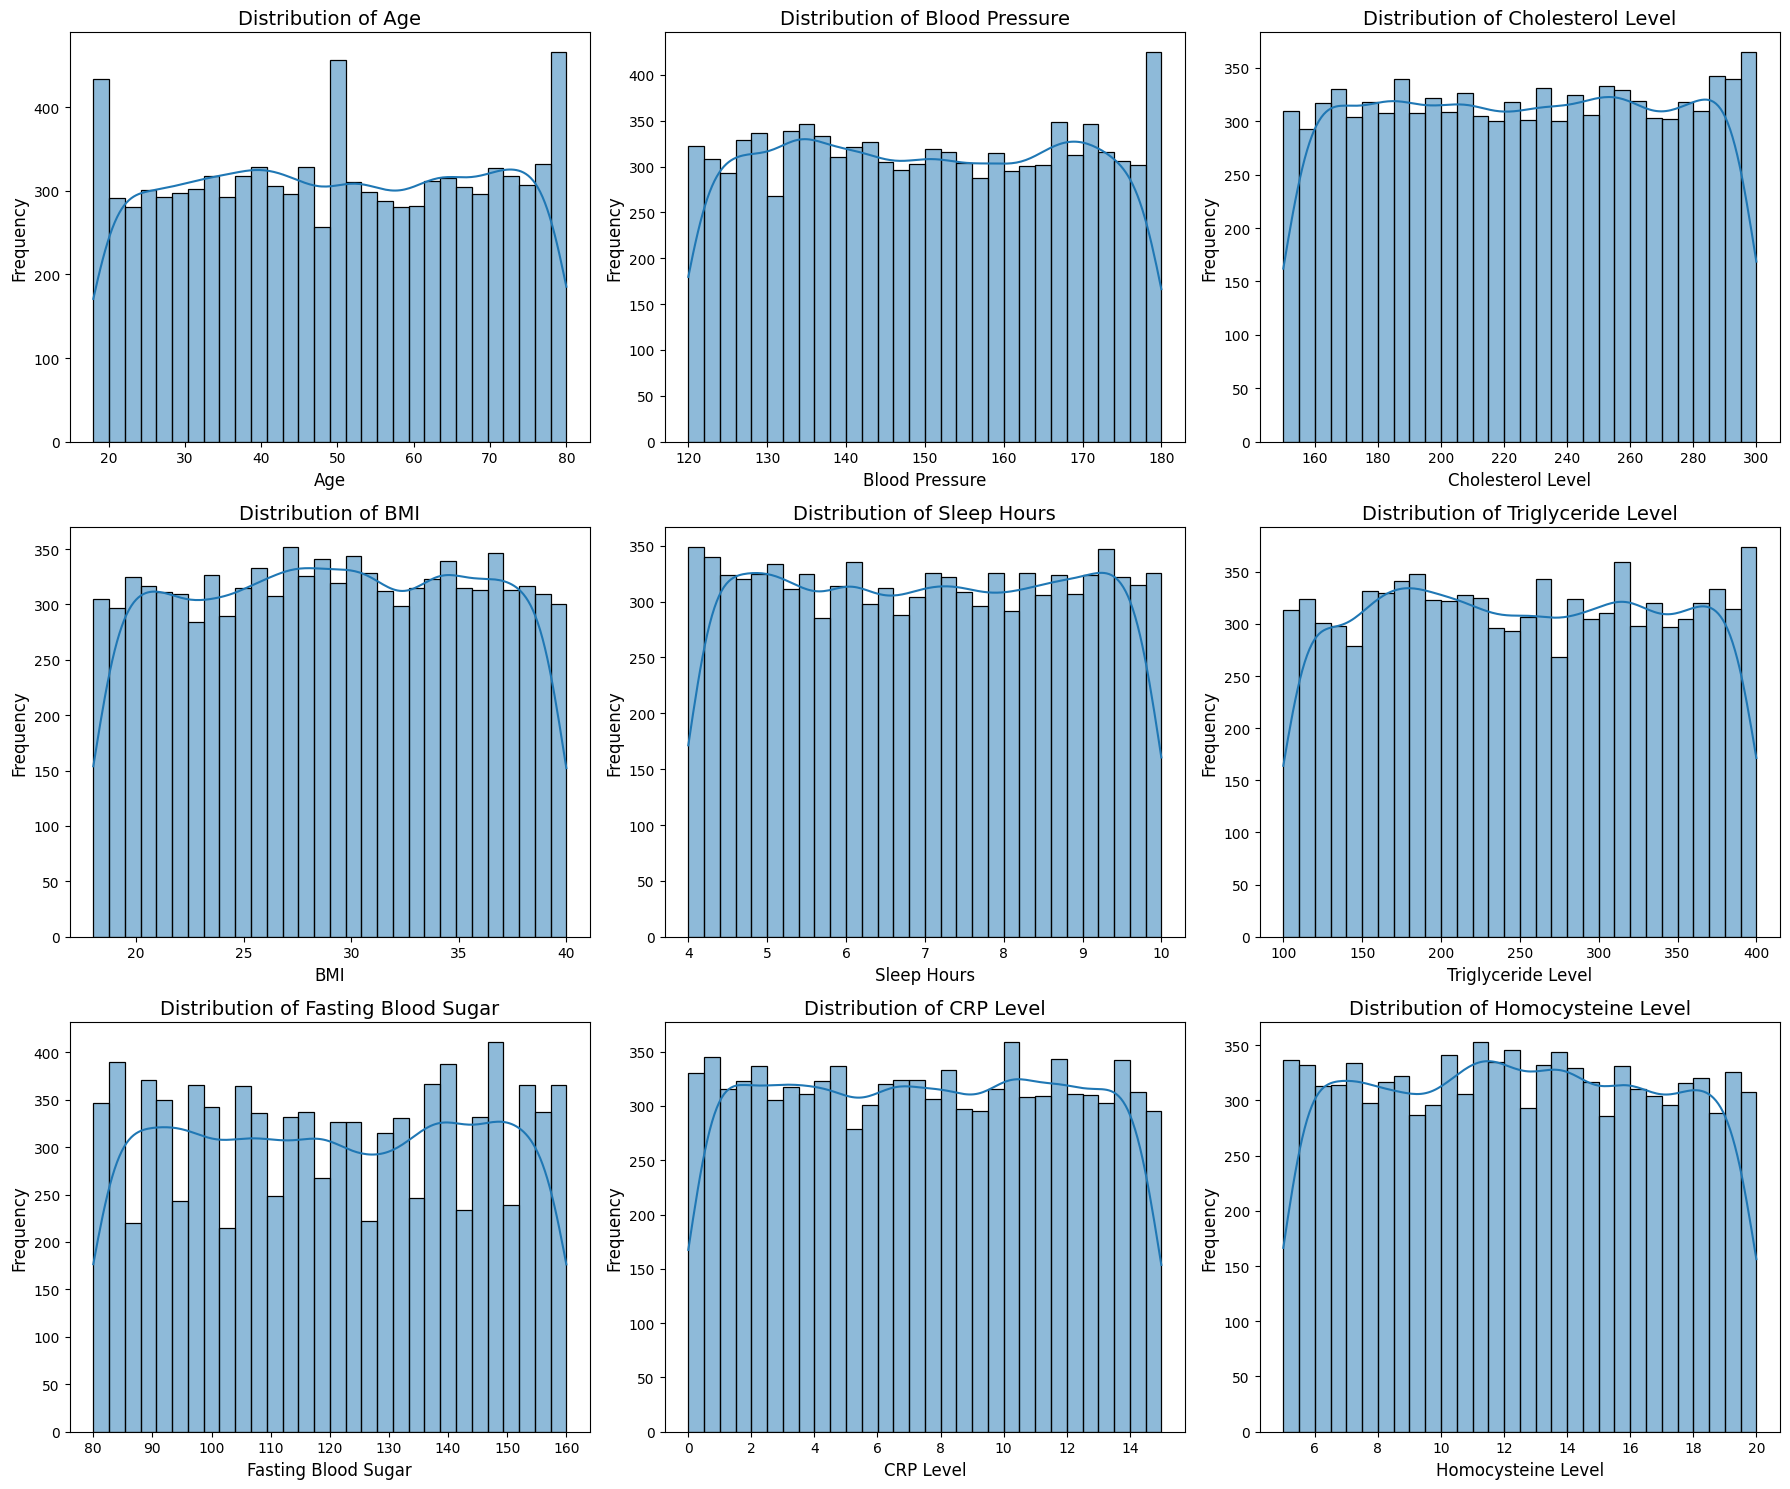


Distributions of Categorical Features



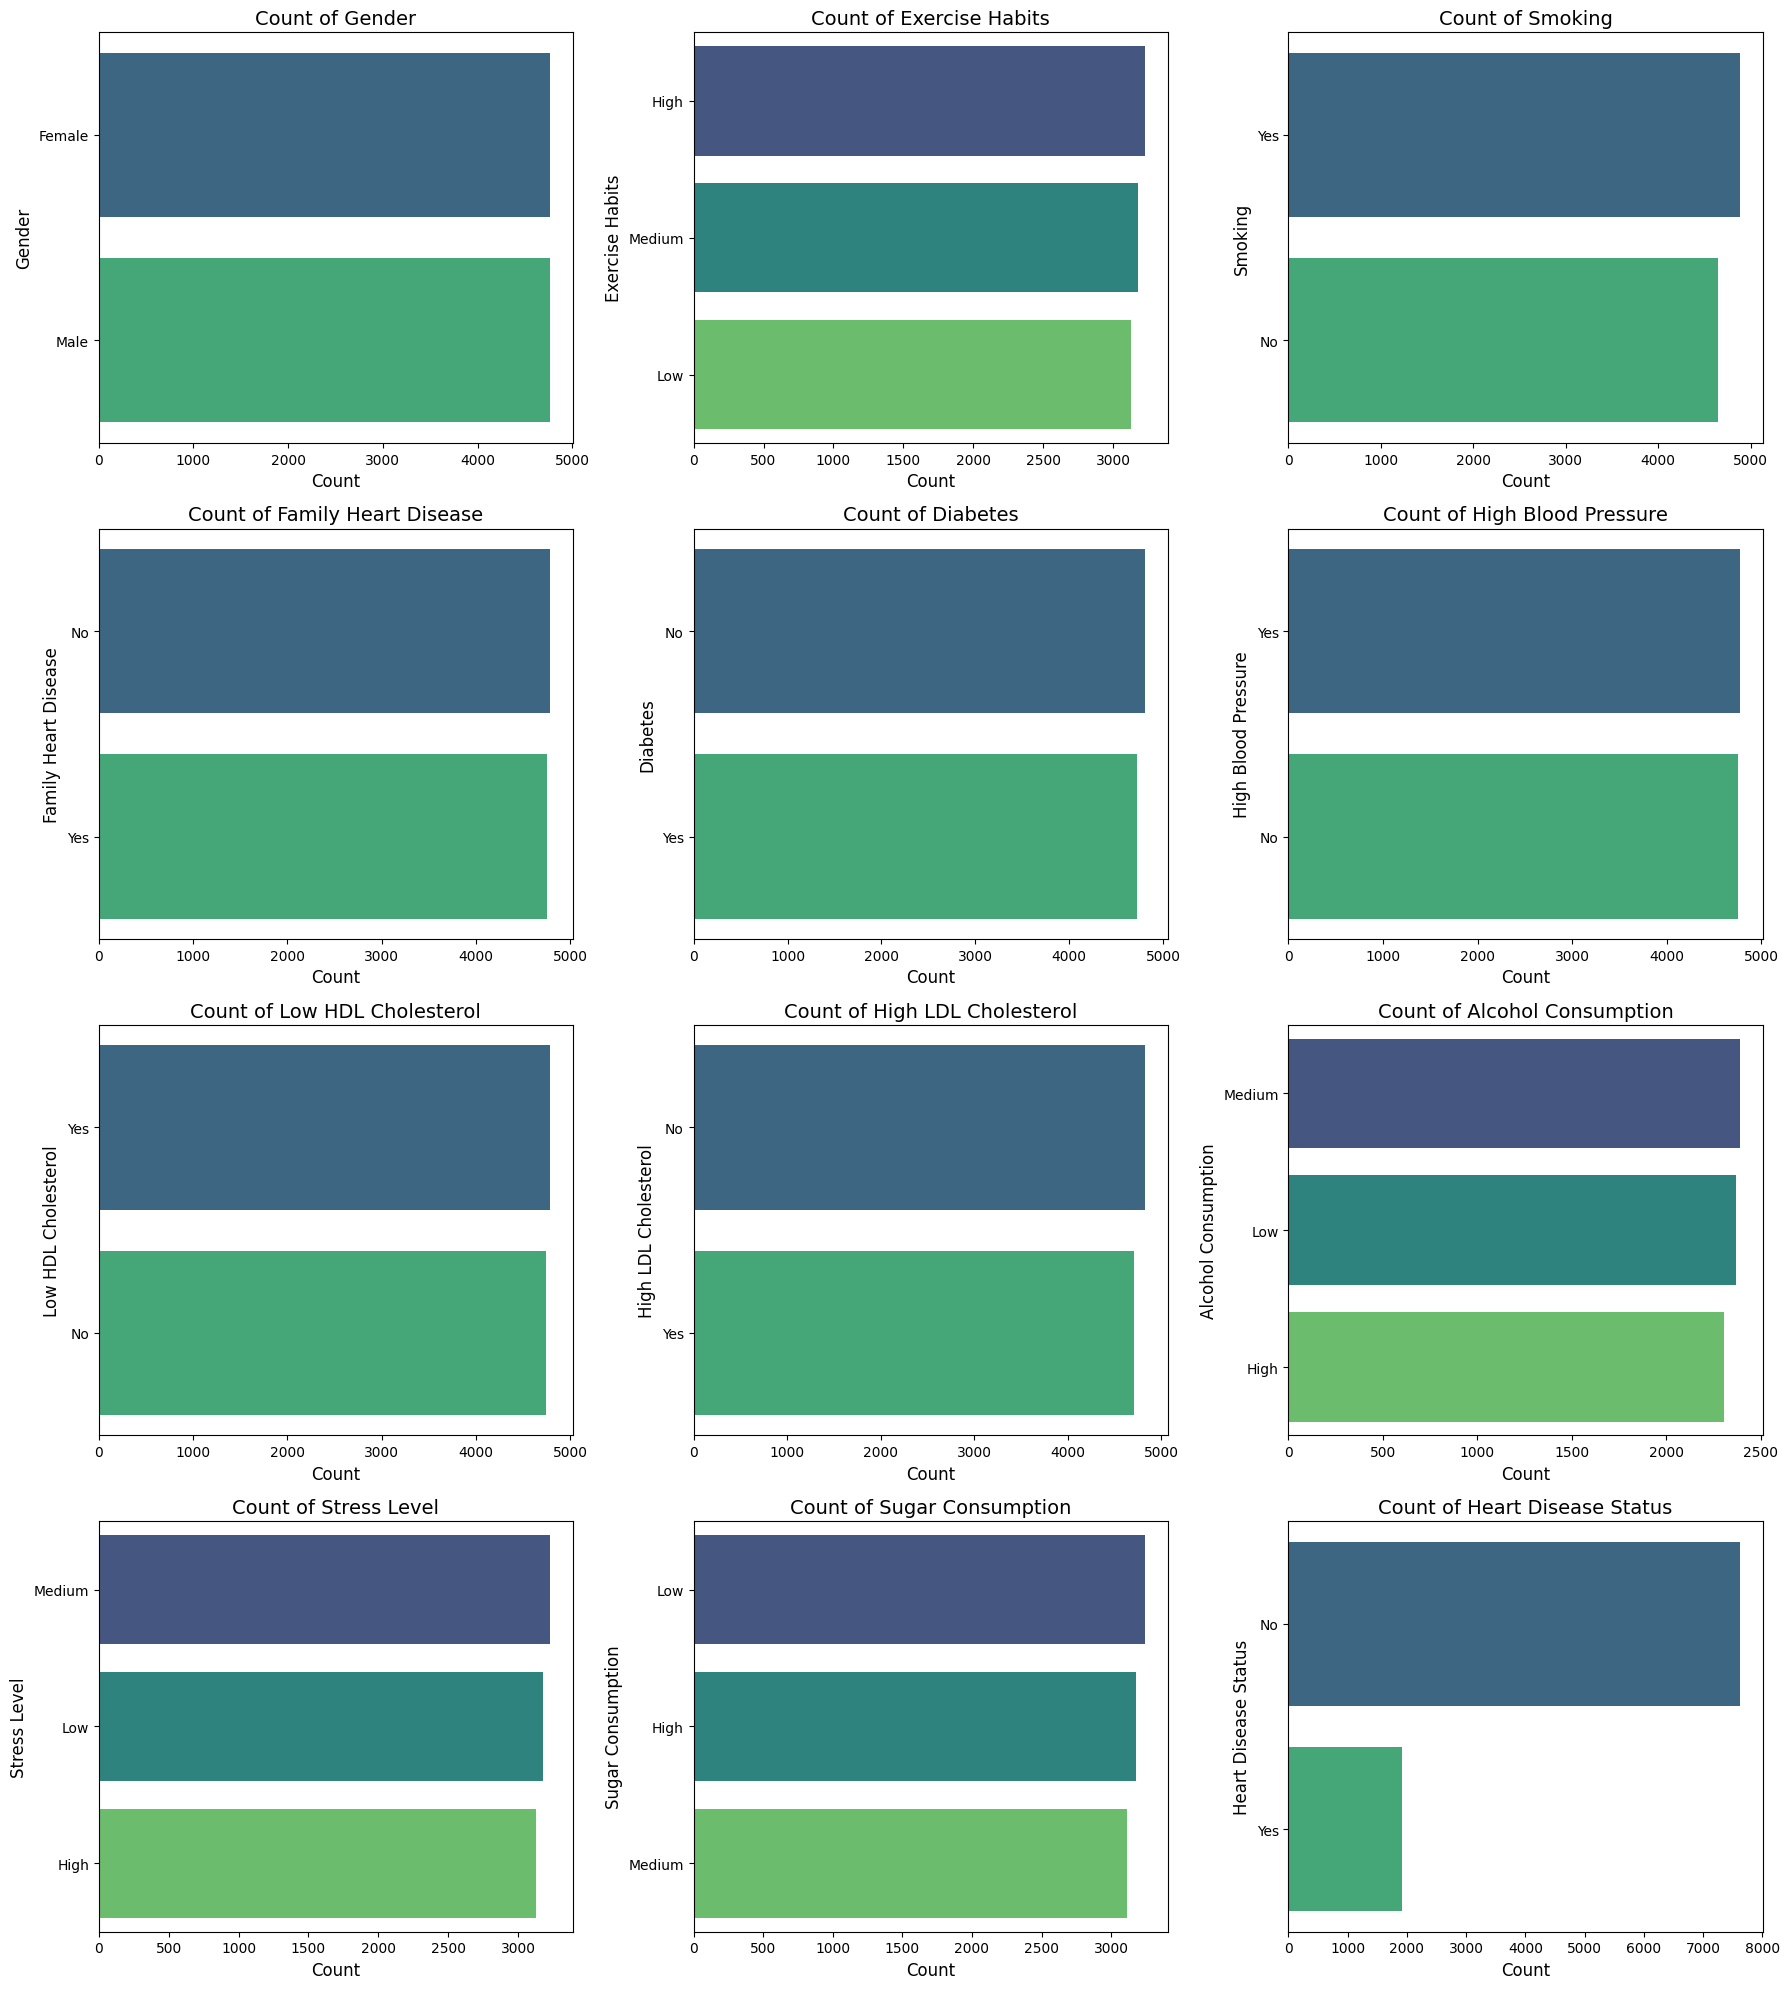

In [ ]:
# Define numerical and categorical columns from df1
numerical_cols = ['Age', 'Blood Pressure', 'Cholesterol Level', 'BMI', 'Sleep Hours', 'Triglyceride Level',
                    'Fasting Blood Sugar', 'CRP Level', 'Homocysteine Level']
categorical_cols = ['Gender', 'Exercise Habits', 'Smoking', 'Family Heart Disease', 'Diabetes',
                     'High Blood Pressure', 'Low HDL Cholesterol', 'High LDL Cholesterol',
                     'Alcohol Consumption', 'Stress Level', 'Sugar Consumption', 'Heart Disease Status']

print("\nDistributions of Numerical Features\n")
num_rows_num = (len(numerical_cols) + 2) // 3
plt.figure(figsize=(18, num_rows_num * 5))
for i, col in enumerate(numerical_cols):
    plt.subplot(num_rows_num, 3, i + 1)
    sns.histplot(df1[col].dropna(), kde=True, bins=30)
    plt.title(f'Distribution of {col}', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
plt.tight_layout()
plt.show()

print("\nDistributions of Categorical Features\n")
num_rows_cat = (len(categorical_cols) + 2) // 3
plt.figure(figsize=(18, num_rows_cat * 5))
for i, col in enumerate(categorical_cols):
    plt.subplot(num_rows_cat, 3, i + 1)
    sns.countplot(y=col, data=df1.dropna(subset=[col]), palette='viridis', order=df1[col].value_counts().index)
    plt.title(f'Count of {col}', fontsize=14)
    plt.ylabel(col, fontsize=12)
    plt.xlabel('Count', fontsize=12)
plt.tight_layout()
plt.show()


## Extracting NaN Values

In [ ]:
nan_rows = df1[df1['Alcohol Consumption'].isnull()]
nan_rows

,Age,Gender,Blood Pressure,Cholesterol Level,Exercise Habits,Smoking,Family Heart Disease,Diabetes,BMI,High Blood Pressure,...,High LDL Cholesterol,Alcohol Consumption,Stress Level,Sleep Hours,Sugar Consumption,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level,Heart Disease Status
8,40.0,Female,134.0,296.0,High,No,Yes,Yes,31.739622,No,...,No,NaN,Medium,6.765162,Medium,109.0,139.0,6.694785,19.440650,No
16,20.0,Female,133.0,187.0,High,Yes,No,Yes,37.832158,Yes,...,Yes,NaN,High,4.775667,Low,290.0,144.0,12.472821,11.703830,No
20,41.0,Female,170.0,300.0,Low,No,No,No,20.661064,No,...,Yes,NaN,Low,6.438116,Low,317.0,116.0,1.739325,14.225836,No
27,29.0,Female,163.0,278.0,Low,Yes,Yes,Yes,30.175866,Yes,...,Yes,NaN,Medium,9.022903,Low,292.0,90.0,11.453769,15.900844,No
32,66.0,Female,129.0,253.0,Low,No,Yes,No,18.139130,No,...,No,NaN,Low,8.274001,High,248.0,101.0,13.131432,13.770121,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9516,27.0,Female,138.0,212.0,Low,Yes,Yes,No,38.623610,No,...,Yes,NaN,High,9.343817,Low,191.0,143.0,12.275678,9.924480,Yes
9523,41.0,Female,160.0,241.0,Medium,No,Yes,Yes,39.346342,Yes,...,Yes,NaN,High,4.343666,Low,178.0,106.0,4.718864,14.219791,Yes
9525,27.0,Female,153.0,188.0,Medium,No,No,Yes,28.173059,Yes,...,No,NaN,Medium,4.834842,High,300.0,118.0,6.216700,13.114808,Yes
9528,38.0,Male,172.0,154.0,Medium,No,No,No,31.856801,Yes,...,Yes,NaN,High,8.247784,Low,377.0,83.0,2.658267,9.715709,Yes


## Categorical variables

In [ ]:
categorical = ['Gender','Exercise Habits', 'Smoking', 'Family Heart Disease', 'Diabetes',
              'High Blood Pressure', 'Low HDL Cholesterol', 'High LDL Cholesterol',
       'Alcohol Consumption', 'Stress Level', 'Sugar Consumption', 'Heart Disease Status']

## Numercial Variables

In [ ]:
numerical = ['Age', 'Blood Pressure', 'Cholesterol Level', 'BMI', 'Sleep Hours', 'Triglyceride Level',
             'Fasting Blood Sugar', 'CRP Level', 'Homocysteine Level']

## Check Missing Values

In [ ]:
df1.isnull().sum()

,0
Age,0
Gender,0
Blood Pressure,0
Cholesterol Level,0
Exercise Habits,0
Smoking,0
Family Heart Disease,0
Diabetes,0
BMI,0
High Blood Pressure,0


## Unique Variables for Categorical data

In [ ]:
df_categorical = df[['Gender','Exercise Habits', 'Smoking', 'Family Heart Disease', 'Diabetes',
              'High Blood Pressure', 'Low HDL Cholesterol', 'High LDL Cholesterol',
       'Alcohol Consumption', 'Stress Level', 'Sugar Consumption', 'Heart Disease Status']]

unique_values = df_categorical.apply(pd.Series.unique)
unique_values

,0
Gender,"[Male, Female, nan]"
Exercise Habits,"[High, Low, Medium, nan]"
Smoking,"[Yes, No, nan]"
Family Heart Disease,"[Yes, No, nan]"
Diabetes,"[No, Yes, nan]"
High Blood Pressure,"[Yes, No, nan]"
Low HDL Cholesterol,"[Yes, No, nan]"
High LDL Cholesterol,"[No, Yes, nan]"
Alcohol Consumption,"[High, Medium, Low, nan]"
Stress Level,"[Medium, High, Low, nan]"


## Categorical Features Encoding

In [ ]:
df2 = df.copy()
label_encoder = LabelEncoder()
df2["Heart Disease Status"] = label_encoder.fit_transform(df2["Heart Disease Status"])

In [ ]:
numerical

['Age',
 'Blood Pressure',
 'Cholesterol Level',
 'BMI',
 'Sleep Hours',
 'Triglyceride Level',
 'Fasting Blood Sugar',
 'CRP Level',
 'Homocysteine Level']

In [ ]:
numerical_1 = ['Age', 'Blood Pressure', 'Cholesterol Level', 'BMI', 'Sleep Hours', 'Triglyceride Level',
             'Fasting Blood Sugar', 'CRP Level', 'Homocysteine Level']

In [ ]:
pd.DataFrame({"skewness" : df[numerical].skew(axis = 0, skipna = True) })
# No skewness in data

,skewness
Age,-0.006789
Blood Pressure,0.013907
Cholesterol Level,-0.007120
BMI,-0.021342
Sleep Hours,0.000172
Triglyceride Level,0.006142
Fasting Blood Sugar,-0.008915
CRP Level,-0.004069
Homocysteine Level,0.007886


## Convert categorical variables to numerical

In [ ]:
df5 = df1.copy()

In [ ]:
df5['Gender'].replace(["Male", "Female"], [0,1], inplace = True)
df5['Exercise Habits'].replace(["High", "Medium", "Low"], [0,1,2], inplace = True)
df5['Smoking'].replace(["Yes", "No"], [0,1], inplace = True)
df5['Family Heart Disease'].replace(["Yes", "No"], [0,1], inplace = True)
df5['Diabetes'].replace(["Yes", "No"], [0,1], inplace = True)
df5['High Blood Pressure'].replace(["Yes", "No"], [0,1], inplace = True)
df5['Low HDL Cholesterol'].replace(["Yes", "No"], [0,1], inplace = True)
df5['High LDL Cholesterol'].replace(["Yes", "No"], [0,1], inplace = True)
df5['Alcohol Consumption'].replace(["High", "Medium", "Low"], [0,1,2], inplace = True)
df5['Stress Level'].replace(["High", "Medium", "Low"], [0,1,2], inplace = True)
df5['Sugar Consumption'].replace(["High", "Medium", "Low"], [0,1,2], inplace = True)
df5['Heart Disease Status'].replace(["Yes", "No"], [0,1], inplace = True)

In [ ]:
df5

,Age,Gender,Blood Pressure,Cholesterol Level,Exercise Habits,Smoking,Family Heart Disease,Diabetes,BMI,High Blood Pressure,...,High LDL Cholesterol,Alcohol Consumption,Stress Level,Sleep Hours,Sugar Consumption,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level,Heart Disease Status
0,69.0,1,146.0,286.0,0,1,0,0,25.221799,1,...,1,1.0,0,8.744034,1,133.0,157.0,9.355389,19.298875,1
1,46.0,0,126.0,216.0,2,1,1,1,29.855447,1,...,0,2.0,2,4.440440,2,393.0,92.0,12.709873,11.230926,1
2,32.0,1,122.0,293.0,0,0,0,1,24.130477,0,...,0,2.0,0,5.249405,0,293.0,94.0,12.509046,5.961958,1
3,60.0,0,166.0,242.0,2,0,0,0,20.486289,0,...,1,2.0,0,7.030971,0,263.0,154.0,10.381259,8.153887,1
4,25.0,0,152.0,257.0,2,0,1,1,28.144681,1,...,1,2.0,1,5.504876,2,126.0,91.0,4.297575,10.815983,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9527,25.0,1,136.0,243.0,1,0,1,1,18.788791,0,...,0,1.0,0,6.834954,1,343.0,133.0,3.588814,19.132004,0
9528,38.0,0,172.0,154.0,1,1,1,1,31.856801,0,...,0,NaN,0,8.247784,2,377.0,83.0,2.658267,9.715709,0
9529,73.0,0,152.0,201.0,0,0,1,0,26.899911,1,...,0,NaN,2,4.436762,2,248.0,88.0,4.408867,9.492429,0
9530,23.0,0,142.0,299.0,2,0,1,0,34.964026,0,...,0,1.0,0,8.526329,1,113.0,153.0,7.215634,11.873486,0


In [ ]:
df5.isnull().sum()

,0
Age,0
Gender,0
Blood Pressure,0
Cholesterol Level,0
Exercise Habits,0
Smoking,0
Family Heart Disease,0
Diabetes,0
BMI,0
High Blood Pressure,0


## Mode Imputation to fill missing values of alcohol consumption

In [ ]:
known_data = df5[df5["Alcohol Consumption"].notna()]
unknown_data = df5[df5["Alcohol Consumption"].isna()]

In [ ]:
X_train = known_data.drop('Alcohol Consumption', axis=1)
y_train = known_data['Alcohol Consumption']

X_test = unknown_data.drop('Alcohol Consumption', axis=1)
y_test = unknown_data['Alcohol Consumption']

In [ ]:
# Calculate the mode of 'Alcohol Consumption' from the known data
mode_alcohol_consumption = known_data['Alcohol Consumption'].mode()[0]

# Fill in the missing values in df5 with the calculated mode
df5['Alcohol Consumption'] = df5['Alcohol Consumption'].fillna(mode_alcohol_consumption).astype(int)


In [ ]:
df5

,Age,Gender,Blood Pressure,Cholesterol Level,Exercise Habits,Smoking,Family Heart Disease,Diabetes,BMI,High Blood Pressure,...,High LDL Cholesterol,Alcohol Consumption,Stress Level,Sleep Hours,Sugar Consumption,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level,Heart Disease Status
0,69.0,1,146.0,286.0,0,1,0,0,25.221799,1,...,1,1,0,8.744034,1,133.0,157.0,9.355389,19.298875,1
1,46.0,0,126.0,216.0,2,1,1,1,29.855447,1,...,0,2,2,4.440440,2,393.0,92.0,12.709873,11.230926,1
2,32.0,1,122.0,293.0,0,0,0,1,24.130477,0,...,0,2,0,5.249405,0,293.0,94.0,12.509046,5.961958,1
3,60.0,0,166.0,242.0,2,0,0,0,20.486289,0,...,1,2,0,7.030971,0,263.0,154.0,10.381259,8.153887,1
4,25.0,0,152.0,257.0,2,0,1,1,28.144681,1,...,1,2,1,5.504876,2,126.0,91.0,4.297575,10.815983,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9527,25.0,1,136.0,243.0,1,0,1,1,18.788791,0,...,0,1,0,6.834954,1,343.0,133.0,3.588814,19.132004,0
9528,38.0,0,172.0,154.0,1,1,1,1,31.856801,0,...,0,1,0,8.247784,2,377.0,83.0,2.658267,9.715709,0
9529,73.0,0,152.0,201.0,0,0,1,0,26.899911,1,...,0,1,2,4.436762,2,248.0,88.0,4.408867,9.492429,0
9530,23.0,0,142.0,299.0,2,0,1,0,34.964026,0,...,0,1,0,8.526329,1,113.0,153.0,7.215634,11.873486,0


In [ ]:
df5.isnull().sum()

,0
Age,0
Gender,0
Blood Pressure,0
Cholesterol Level,0
Exercise Habits,0
Smoking,0
Family Heart Disease,0
Diabetes,0
BMI,0
High Blood Pressure,0


# 9. Apply SMOTE to the entire dataset to balance target values

In [ ]:
# The target values are imbalanced, so we apply the SMOTE method to address this imbalance.
value_counts = df5['Heart Disease Status'].value_counts()
value_counts

,count
Heart Disease Status,
1,7621
0,1911


In [ ]:
df7 = df5.drop("Heart Disease Status", axis = 1)

In [ ]:
X = df7
y = df5["Heart Disease Status"].astype(int) # Ensure y is a 1D pandas Series and explicitly cast to int

In [ ]:
print("X shape is", X.shape)
print("y shape is", y.shape)

X shape is (9532, 20)
y shape is (9532,)


In [ ]:
smote = SMOTE(sampling_strategy='auto', random_state=0, k_neighbors=5)

X_resampled, y_resampled = smote.fit_resample(X, y)

In [ ]:
X_resampled.shape

(15242, 20)

In [ ]:
y_resampled.shape

(15242,)

In [ ]:
df8 = pd.DataFrame(X_resampled, columns=X.columns)

df8["Heart Disease Status"] = y_resampled

In [ ]:
df8.shape

(15242, 21)

In [ ]:
df9 = df8.drop("Heart Disease Status", axis = 1)

In [ ]:
df8.columns

Index(['Age', 'Gender', 'Blood Pressure', 'Cholesterol Level',
       'Exercise Habits', 'Smoking', 'Family Heart Disease', 'Diabetes', 'BMI',
       'High Blood Pressure', 'Low HDL Cholesterol', 'High LDL Cholesterol',
       'Alcohol Consumption', 'Stress Level', 'Sleep Hours',
       'Sugar Consumption', 'Triglyceride Level', 'Fasting Blood Sugar',
       'CRP Level', 'Homocysteine Level', 'Heart Disease Status'],
      dtype='object')

# Normalize Data

In [ ]:
Scaler = MinMaxScaler(feature_range=(0,1))

norm = Scaler.fit_transform(df9)

df_norm = pd.DataFrame(norm, columns = ['Age', 'Gender', 'Blood Pressure', 'Cholesterol Level',
       'Exercise Habits', 'Smoking', 'Family Heart Disease', 'Diabetes', 'BMI',
       'High Blood Pressure', 'Low HDL Cholesterol', 'High LDL Cholesterol',
       'Alcohol Consumption', 'Stress Level', 'Sleep Hours',
       'Sugar Consumption', 'Triglyceride Level', 'Fasting Blood Sugar',
       'CRP Level', 'Homocysteine Level'])

df_norm

,Age,Gender,Blood Pressure,Cholesterol Level,Exercise Habits,Smoking,Family Heart Disease,Diabetes,BMI,High Blood Pressure,Low HDL Cholesterol,High LDL Cholesterol,Alcohol Consumption,Stress Level,Sleep Hours,Sugar Consumption,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level
0,0.822581,1.0,0.433333,0.906667,0.0,1.0,0.0,0.0,0.328093,1.0,0.0,1.0,0.5,0.0,0.790657,0.5,0.110000,0.962500,0.623722,0.953319
1,0.451613,0.0,0.100000,0.440000,1.0,1.0,1.0,1.0,0.538811,1.0,0.0,0.0,1.0,1.0,0.073314,1.0,0.976667,0.150000,0.847452,0.415412
2,0.225806,1.0,0.033333,0.953333,0.0,0.0,0.0,1.0,0.278465,0.0,1.0,0.0,1.0,0.0,0.208156,0.0,0.643333,0.175000,0.834058,0.064120
3,0.677419,0.0,0.766667,0.613333,1.0,0.0,0.0,0.0,0.112744,0.0,1.0,1.0,1.0,0.0,0.505116,0.0,0.543333,0.925000,0.692144,0.210260
4,0.112903,0.0,0.533333,0.713333,1.0,0.0,1.0,1.0,0.461013,1.0,1.0,1.0,1.0,0.5,0.250739,1.0,0.086667,0.137500,0.286387,0.387747
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15237,0.844942,0.0,0.094461,0.747254,0.5,0.0,0.0,0.0,0.674287,0.0,1.0,0.0,0.5,1.0,0.471575,1.0,0.502633,0.199787,0.938252,0.747232
15238,0.312377,1.0,0.029535,0.397891,0.0,0.0,1.0,0.0,0.330392,0.0,0.0,0.0,1.0,1.0,0.521382,1.0,0.776496,0.930697,0.438263,0.649810
15239,0.872935,0.0,0.437886,0.562016,0.5,0.0,0.0,0.0,0.091909,0.0,1.0,1.0,0.5,0.5,0.701667,0.5,0.732537,0.880671,0.607856,0.355467
15240,0.018708,0.0,0.157994,0.021066,0.5,0.0,1.0,0.0,0.260794,1.0,0.0,0.0,0.5,0.0,0.111508,0.5,0.599227,0.690204,0.377843,0.366606


In [ ]:
X = df_norm
y = df8["Heart Disease Status"] #Change y, use other feature to compare (Heart Disease)

# we calculate y Blood Pressure: Greater than 120  +
# Cholesterol level: Greater than 240  +
# Sleep Hours: Less than 5 +
# Triglyceride level: Greater than 300  +
# CRP level: Greater than 10 +
# Homocysteine  Level: More than 15 +


# ML Models

## XGBClassifier

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize and train XGBoost model
xgb_model = XGBClassifier(n_estimators=50, learning_rate=0.1, max_depth=3, random_state=42)
xgb_model.fit(X_train, y_train)

# Predictions
y_pred_xgb = xgb_model.predict(X_test)
y_prob_xgb = xgb_model.predict_proba(X_test)[:, 1]

# Evaluation
print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.74      0.75      1525
           1       0.74      0.75      0.75      1524

    accuracy                           0.75      3049
   macro avg       0.75      0.75      0.75      3049
weighted avg       0.75      0.75      0.75      3049



In [ ]:
print("XGB Model Accuracy Score:", round(accuracy_score(y_test, y_pred_xgb) * 100, 2), "%")

XGB Model Accuracy Score: 74.68 %


In [ ]:
print("XGB Cross-validation score:", cross_val_score(xgb_model , y_test, y_pred_xgb, cv = 10).mean())

XGB Cross-validation score: 0.7468000431406384


In [ ]:
print("\nXGB Confusion Matrix:\n", confusion_matrix(y_test,y_pred_xgb))


XGB Confusion Matrix:
 [[1130  395]
 [ 377 1147]]


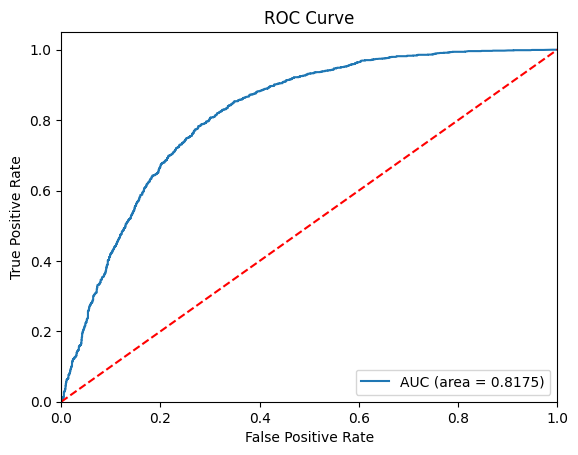

In [ ]:
Xgb_roc_auc = roc_auc_score(y_test, y_prob_xgb)

fpr, tpr, thresholds = roc_curve(y_test, xgb_model.predict_proba(X_test)[:,1])

plt.figure()
plt.plot(fpr, tpr, label = "AUC (area = %0.4f)" % Xgb_roc_auc)
plt.plot([0,1], [0,1], "r--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

## MLP

In [ ]:
mlp_model = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=300, activation='relu', solver='adam', random_state=42)

# Train the MLP model
mlp_model.fit(X_train, y_train)

y_pred_mlp = mlp_model.predict(X_test)
y_prob_mlp = mlp_model.predict_proba(X_test)[:, 1]


print("MLP Classification Report:")
print(classification_report(y_test, y_pred_mlp))

MLP Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.76      0.73      1525
           1       0.74      0.69      0.71      1524

    accuracy                           0.72      3049
   macro avg       0.72      0.72      0.72      3049
weighted avg       0.72      0.72      0.72      3049



In [ ]:
print("MLP Model Accuracy Score:", round(accuracy_score(y_test, y_pred_mlp) * 100, 2), "%")

MLP Model Accuracy Score: 72.38 %


In [ ]:
print("\nMLP Cross-validation score:", cross_val_score(mlp_model, X_train, y_train, cv=5).mean())


MLP Cross-validation score: 0.7331253714505972


In [ ]:
print("\nMLP Confusion Matrix:\n", confusion_matrix(y_test, y_pred_mlp))


MLP Confusion Matrix:
 [[1158  367]
 [ 475 1049]]


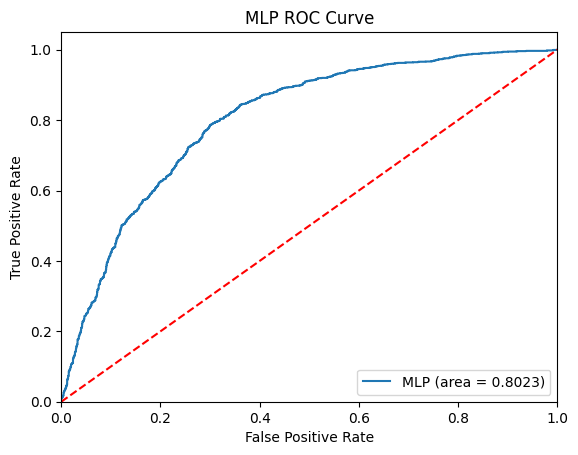

In [ ]:
# ROC Curve and AUC Score
mlp_roc_auc = roc_auc_score(y_test, mlp_model.predict_proba(X_test)[:,1])
fpr, tpr, thresholds = roc_curve(y_test, mlp_model.predict_proba(X_test)[:,1])

plt.figure()
plt.plot(fpr, tpr, label='MLP (area = %0.4f)' % mlp_roc_auc)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('MLP ROC Curve')
plt.legend(loc="lower right")
plt.show()

## LightGBM

In [ ]:
# Initialize and train LightGBM model
lgb_model = lgb.LGBMClassifier(n_estimators=100, learning_rate=0.1, max_depth=-1, random_state=42)
lgb_model.fit(X_train, y_train)

# Predictions
y_pred_lgb3 = lgb_model.predict(X_test)
y_prob_lgb3 = lgb_model.predict_proba(X_test)[:, 1]

print("LightGBM Classification Report:")
print(classification_report(y_test, y_pred_lgb3))

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 6097, number of negative: 6096
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004803 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2317
[LightGBM] [Info] Number of data points in the train set: 12193, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500041 -> initscore=0.000164
[LightGBM] [Info] Start training from score 0.000164
LightGBM Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.77      0.80      1525
           1       0.79      0.84      0.81      1524

    accuracy                           0.80      3049
   macro avg       0.81      0.80      0.80      3049
weighted avg       0.81      0.80      0.80      3049



In [ ]:
print("MLP Model Accuracy Score:", round(accuracy_score(y_test, y_pred_lgb3) * 100, 2), "%")

MLP Model Accuracy Score: 80.49 %


In [ ]:
print("\nMLP Cross-validation score:", cross_val_score(mlp_model, X_train, y_train, cv=5).mean())


MLP Cross-validation score: 0.7331253714505972


In [ ]:
print("\nXGB Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lgb3))


XGB Confusion Matrix:
 [[1179  346]
 [ 249 1275]]


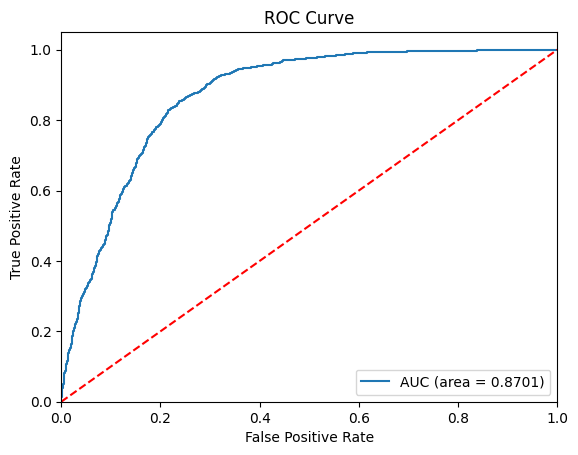

In [ ]:
lgb_roc_auc = roc_auc_score(y_test, y_prob_lgb3)

fpr, tpr, thresholds = roc_curve(y_test, lgb_model.predict_proba(X_test)[:,1])

plt.figure()
plt.plot(fpr, tpr, label = "AUC (area = %0.4f)" % lgb_roc_auc)
plt.plot([0,1], [0,1], "r--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

## CNN


In [ ]:
y_train_cnn_cat = to_categorical(y_train)
y_test_cnn_cat = to_categorical(y_test)
X_train_cnn = X_train.values[..., np.newaxis]
X_test_cnn = X_test.values[..., np.newaxis]


In [ ]:
def create_cnn_model(input_shape):
    model = Sequential()
    model.add(Conv1D(filters=32, kernel_size=2, activation='relu', input_shape=input_shape))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))
    model.add(Conv1D(filters=64, kernel_size=2, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(2, activation='softmax'))
    model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = []

for train_idx, val_idx in kfold.split(X_train_cnn, y_train):
    X_tr, X_val = X_train_cnn[train_idx], X_train_cnn[val_idx]
    y_tr, y_val = y_train_cnn_cat[train_idx], y_train_cnn_cat[val_idx]

    model = create_cnn_model(input_shape=(X_tr.shape[1], 1))
    model.fit(X_tr, y_tr, epochs=20, batch_size=32, verbose=0)

    val_pred = np.argmax(model.predict(X_val), axis=1)
    val_true = np.argmax(y_val, axis=1)
    acc = accuracy_score(val_true, val_pred)
    cv_scores.append(acc)


print(f"\nCNN Mean CV Accuracy: {np.mean(cv_scores) * 100:.4f} %")
print(f"\nCNN Cross-validation scores: {cv_scores}")

77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step

CNN Mean CV Accuracy: 75.5680 %

CNN Cross-validation scores: [0.7490774907749077, 0.7429274292742928, 0.7650676506765067, 0.7534864643150123, 0.7678424938474159]


In [ ]:
cnn_model = create_cnn_model(input_shape=(X_train_cnn.shape[1], 1))
cnn_model.fit(X_train_cnn, y_train_cnn_cat, epochs=20, batch_size=32, verbose=0)

y_pred_prob_cnn = cnn_model.predict(X_test_cnn)

y_pred_cnn = np.argmax(y_pred_prob_cnn, axis=1)
y_prob_cnn = y_pred_prob_cnn[:, 1]

print("CNN Classification Report:\n", classification_report(y_test, y_pred_cnn))
print("CNN Accuracy Score:", accuracy_score(y_test, y_pred_cnn))
print("CNN Confusion Matrix:\n", confusion_matrix(y_test, y_pred_cnn))


96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
CNN Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.74      0.75      1525
           1       0.75      0.77      0.76      1524

    accuracy                           0.76      3049
   macro avg       0.76      0.76      0.76      3049
weighted avg       0.76      0.76      0.76      3049

CNN Accuracy Score: 0.7559855690390291
CNN Confusion Matrix:
 [[1131  394]
 [ 350 1174]]


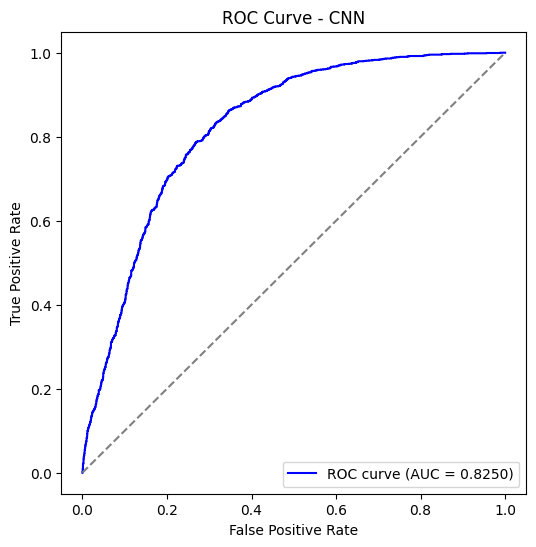

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob_cnn)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0,1], [0,1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - CNN')
plt.legend(loc='lower right')
plt.show()

## TabTransformer


In [ ]:
class TabTransformer(nn.Module):
    def __init__(self, num_features, dim=64, depth=2, heads=4, mlp_dim=128,
                 dropout=0.2, num_classes=2):
        super().__init__()
        self.num_features = num_features
        self.feature_norm = nn.LayerNorm(num_features)
        self.embedding = nn.Linear(1, dim)

        encoder_layer = nn.TransformerEncoderLayer(
            d_model=dim,
            nhead=heads,
            dim_feedforward=mlp_dim,
            dropout=dropout,
            batch_first=True,
            activation="gelu",
            norm_first=True
        )
        self.transformer = nn.TransformerEncoder(encoder_layer, num_layers=depth)
        self.feature_gate_net = nn.Sequential(
            nn.Linear(num_features, 64),
            nn.ReLU(),
            nn.Linear(64, num_features),
            nn.Sigmoid()
        )

        self.mlp = nn.Sequential(
            nn.LayerNorm(dim * num_features),
            nn.Linear(dim * num_features, mlp_dim),
            nn.GELU(),
            nn.Dropout(dropout),
            nn.Linear(mlp_dim, mlp_dim//2),
            nn.GELU(),
            nn.Dropout(dropout),
            nn.Linear(mlp_dim//2, num_classes)
        )

    def forward(self, x):
        x_original = x

        gate = self.feature_gate_net(self.feature_norm(x_original))
        gate = gate.unsqueeze(-1)

        x = x.unsqueeze(-1)
        x = self.embedding(x)
        x = x * gate
        x = self.transformer(x)
        x = x.flatten(start_dim=1)

        return self.mlp(x)

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.long)
X_test_tensor  = torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensor  = torch.tensor(y_test.values, dtype=torch.long)

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
MAX_EPOCHS = 200
BATCH_SIZE = 128
cv_scores = []
test_preds_folds_tf = []

In [ ]:
for fold, (train_idx, val_idx) in enumerate(kf.split(X_train_tensor, y_train_tensor)):
    print(f"\nFOLD {fold+1}")

    train_dataset = TensorDataset(X_train_tensor[train_idx], y_train_tensor[train_idx])
    val_dataset   = TensorDataset(X_train_tensor[val_idx], y_train_tensor[val_idx])

    train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
    val_loader   = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False)

    # Create model
    model = TabTransformer(num_features=X_train_tensor.shape[1]).to(device)

    optimizer = optim.AdamW(model.parameters(), lr=1e-3, weight_decay=1e-4)
    scheduler = optim.lr_scheduler.CosineAnnealingWarmRestarts(
        optimizer, T_0=10, T_mult=2
    )
    criterion = nn.CrossEntropyLoss(label_smoothing=0.05)

    best_val_loss = float("inf")
    patience = 15
    patience_count = 0

    # ------------------ Training ------------------
    for epoch in range(MAX_EPOCHS):
        model.train()
        for X_batch, y_batch in train_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            optimizer.zero_grad()
            logits = model(X_batch)
            loss = criterion(logits, y_batch)
            loss.backward()
            optimizer.step()
            scheduler.step()

        # ------------------ Validation ------------------
        model.eval()
        val_losses = []
        y_true_fold, y_pred_fold = [], []

        with torch.no_grad():
            for X_batch, y_batch in val_loader:
                X_batch, y_batch = X_batch.to(device), y_batch.to(device)

                logits = model(X_batch)
                loss = criterion(logits, y_batch)
                val_losses.append(loss.item())

                preds = torch.argmax(logits, dim=1)
                y_true_fold.extend(y_batch.cpu().numpy())
                y_pred_fold.extend(preds.cpu().numpy())

        val_loss = np.mean(val_losses)
        val_acc = accuracy_score(y_true_fold, y_pred_fold)

        print(f"Epoch {epoch+1} | Val Loss: {val_loss:.4f} | Val Acc: {val_acc:.4f}")

        # Early stopping
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            best_model_state = model.state_dict()
            patience_count = 0
        else:
            patience_count += 1

        if patience_count >= patience:
            print("Early stopping triggered!")
            break

    model.load_state_dict(best_model_state)

    cv_scores.append(val_acc)

    test_loader = DataLoader(TensorDataset(X_test_tensor, y_test_tensor),
                             batch_size=BATCH_SIZE, shuffle=False)

    test_probs = []
    model.eval()
    with torch.no_grad():
        for X_batch, _ in test_loader:
            X_batch = X_batch.to(device)
            logits = model(X_batch)
            probs = F.softmax(logits, dim=1)
            test_probs.extend(probs.cpu().numpy())

    test_preds_folds_tf.append(np.array(test_probs))


========== FOLD 1 ==========
Epoch 1 | Val Loss: 0.6508 | Val Acc: 0.6855
Epoch 2 | Val Loss: 0.5699 | Val Acc: 0.7335
Epoch 3 | Val Loss: 0.5623 | Val Acc: 0.7425
Epoch 4 | Val Loss: 0.5524 | Val Acc: 0.7425
Epoch 5 | Val Loss: 0.5536 | Val Acc: 0.7388
Epoch 6 | Val Loss: 0.5556 | Val Acc: 0.7470
Epoch 7 | Val Loss: 0.5452 | Val Acc: 0.7503
Epoch 8 | Val Loss: 0.5453 | Val Acc: 0.7503
Epoch 9 | Val Loss: 0.5633 | Val Acc: 0.7396
Epoch 10 | Val Loss: 0.5455 | Val Acc: 0.7503
Epoch 11 | Val Loss: 0.5368 | Val Acc: 0.7597
Epoch 12 | Val Loss: 0.5437 | Val Acc: 0.7569
Epoch 13 | Val Loss: 0.5419 | Val Acc: 0.7593
Epoch 14 | Val Loss: 0.5371 | Val Acc: 0.7651
Epoch 15 | Val Loss: 0.5388 | Val Acc: 0.7610
Epoch 16 | Val Loss: 0.5380 | Val Acc: 0.7622
Epoch 17 | Val Loss: 0.5645 | Val Acc: 0.7478
Epoch 18 | Val Loss: 0.5407 | Val Acc: 0.7573
Epoch 19 | Val Loss: 0.5419 | Val Acc: 0.7528
Epoch 20 | Val Loss: 0.5482 | Val Acc: 0.7560
Epoch 21 | Val Loss: 0.5432 | Val Acc: 0.7581
Epoch 22 | Va

In [ ]:
print("\n========== CV RESULTS ==========")
print(f"Mean CV Accuracy: {np.mean(cv_scores):.4f} (+/- {np.std(cv_scores):.4f})")


final_test_probs_tf = np.mean(test_preds_folds_tf, axis=0)
final_test_preds_tf = np.argmax(final_test_probs_tf, axis=1)

y_true = y_test_tensor.numpy()
y_prob_pos_tf = final_test_probs_tf[:, 1]

print("\nFINAL TEST RESULTS")
print("Test Accuracy:", accuracy_score(y_true, final_test_preds_tf))
print("Classification Report:\n", classification_report(y_true, final_test_preds_tf))
print("Confusion Matrix:\n", confusion_matrix(y_true, final_test_preds_tf))


========== CV RESULTS ==========
Mean CV Accuracy: 0.7583 (+/- 0.0114)

========== FINAL TEST RESULTS ==========
Test Accuracy: 0.7773040341095441
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.73      0.77      1525
           1       0.75      0.82      0.79      1524

    accuracy                           0.78      3049
   macro avg       0.78      0.78      0.78      3049
weighted avg       0.78      0.78      0.78      3049

Confusion Matrix:
 [[1116  409]
 [ 270 1254]]


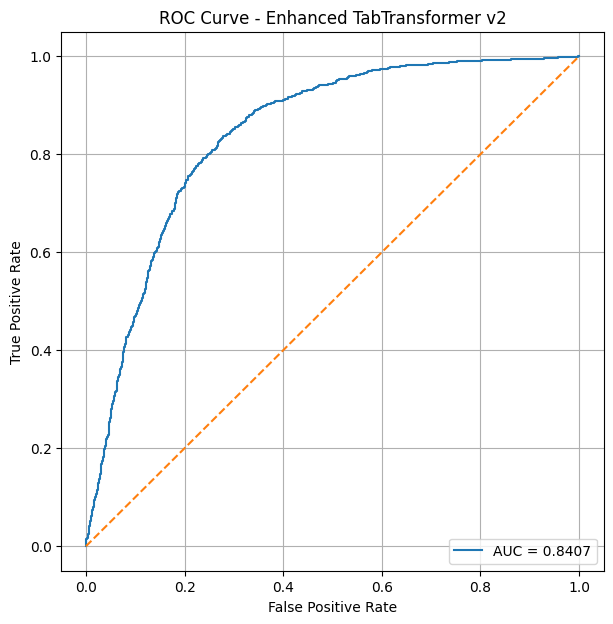

In [ ]:
fpr, tpr, thresholds = roc_curve(y_true, y_prob_pos_tf)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(7,7))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.4f}")
plt.plot([0,1], [0,1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Enhanced TabTransformer v2")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


## SVC

In [ ]:
svc_model = SVC(kernel="rbf", class_weight="balanced", probability=True, random_state=42)
svc_model.fit(X_train, y_train)


y_pred_svc = svc_model.predict(X_test)
y_prob_svc = svc_model.predict_proba(X_test)[:, 1]


acc = accuracy_score(y_test, y_pred_svc)
f1 = f1_score(y_test, y_pred_svc, average='macro')
auc_scv = roc_auc_score(y_test, y_prob_svc)

print("SVC RESULTS")
print(f"Accuracy: {acc:.4f}")
print(f"F1-macro: {f1:.4f}")
print(f"ROC-AUC: {auc_scv:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_svc))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svc))

===== SVC RESULTS ===telek
Accuracy: 0.7668
F1-macro: 0.7666
ROC-AUC: 0.8319

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.73      0.76      1525
           1       0.75      0.80      0.77      1524

    accuracy                           0.77      3049
   macro avg       0.77      0.77      0.77      3049
weighted avg       0.77      0.77      0.77      3049

Confusion Matrix:
 [[1119  406]
 [ 305 1219]]


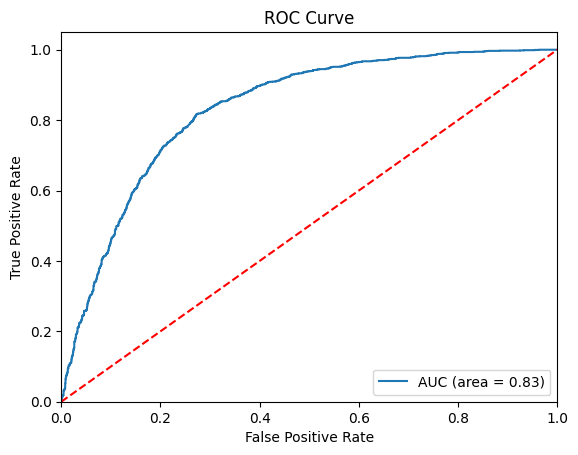

In [ ]:

fpr, tpr, thresholds = roc_curve(y_test, svc_model.predict_proba(X_test)[:,1])

plt.figure()
plt.plot(fpr, tpr, label = "AUC (area = %0.2f)" % auc_scv)
plt.plot([0,1], [0,1], "r--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

# Compare

In [ ]:
from sklearn.metrics import  f1_score



===== MODEL COMPARISON ====
            Model  Accuracy  F1-macro   ROC-AUC
0        LightGBM  0.804854  0.804660  0.870052
1  TabTransformer  0.777304  0.776847  0.840670
2             SVC  0.766809  0.766558  0.831853
3             CNN  0.755986  0.755937  0.825036
4         XGBoost  0.746802  0.746794  0.817507
5             MLP  0.723844  0.723490  0.802284


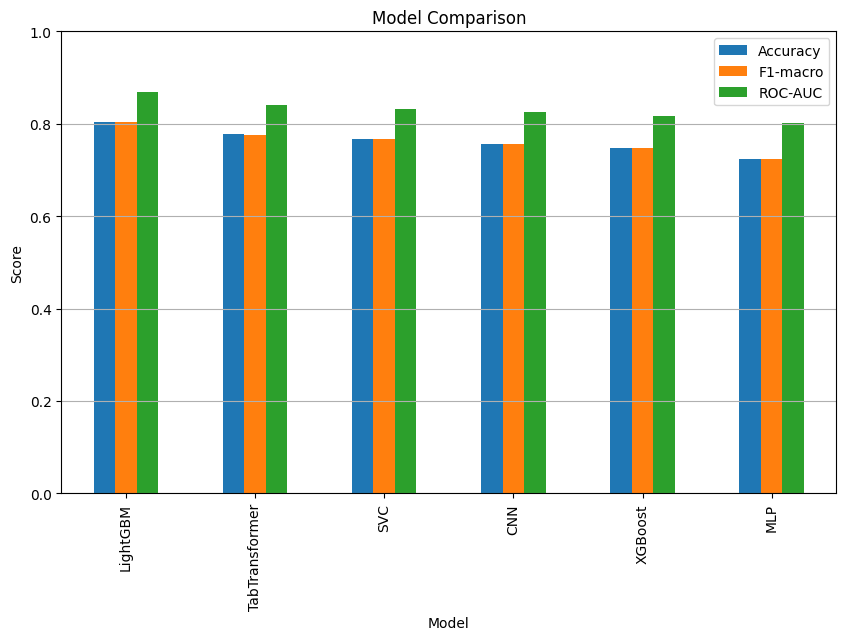

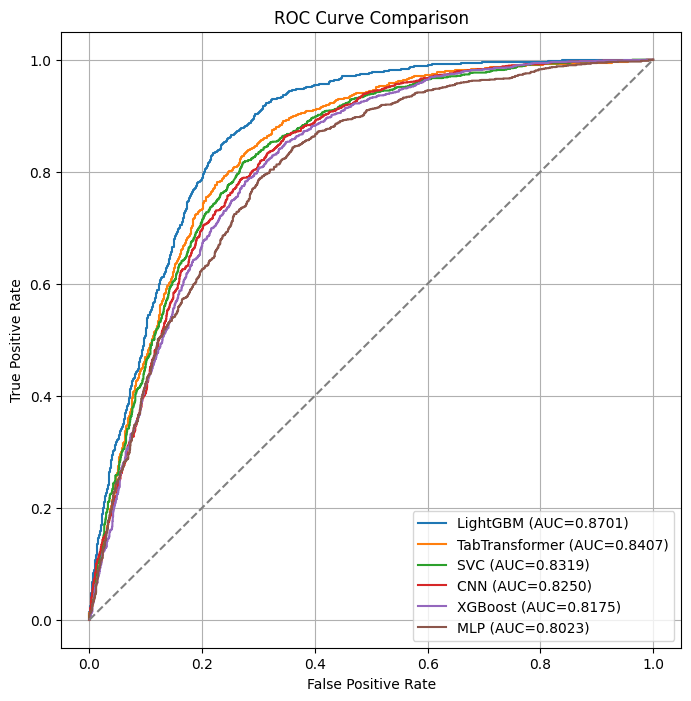

In [ ]:
models_results = {
    "MLP": {"pred": y_pred_mlp, "prob": y_prob_mlp},
    "CNN": {"pred": y_pred_cnn, "prob": y_prob_cnn},
    "XGBoost": {"pred": y_pred_xgb, "prob": y_prob_xgb},
    "LightGBM": {"pred": y_pred_lgb3, "prob": y_prob_lgb3},
    "TabTransformer": {"pred": final_test_preds_tf, "prob": y_prob_pos_tf},
    "SVC": {"pred": y_pred_svc, "prob": y_prob_svc},
}

results_summary = []
roc_data = []

for name, res in models_results.items():
    acc = accuracy_score(y_true, res["pred"])
    f1 = f1_score(y_true, res["pred"], average='macro')

    prob = res["prob"]
    if prob.ndim == 2 and prob.shape[1] == 2:
        prob = prob[:, 1]

    auc_score = roc_auc_score(y_true, prob)

    fpr, tpr, _ = roc_curve(y_true, prob)
    roc_data.append({'name': name, 'fpr': fpr, 'tpr': tpr, 'auc': auc_score})

    results_summary.append({
        "Model": name,
        "Accuracy": acc,
        "F1-macro": f1,
        "ROC-AUC": auc_score
    })

results_df = pd.DataFrame(results_summary)
results_df = results_df.sort_values(by="Accuracy", ascending=False).reset_index(drop=True)

print("MODEL COMPARISON")
print(results_df)

results_df.set_index("Model")[["Accuracy", "F1-macro", "ROC-AUC"]].plot(kind='bar', figsize=(10,6))
plt.title("Model Comparison")
plt.ylabel("Score")
plt.ylim(0,1)
plt.grid(axis='y')
plt.show()

# Sort ROC data by AUC score in descending order
roc_data_sorted = sorted(roc_data, key=lambda x: x['auc'], reverse=True)

plt.figure(figsize=(8, 8))
for entry in roc_data_sorted:
    plt.plot(entry['fpr'], entry['tpr'], label=f"{entry['name']} (AUC={entry['auc']:.4f})")

plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()